Clayton Cohn<br>
May 20, 2020<br>
DSC 478<br>
Prof. Mobasher

# Assignment 4

In [1]:
import pandas as pd

DATA_PATH = "/Users/claytoncohn/Dropbox/New/DePaul/DSC478/data/segmentation_data/"

For this assignment you will experiment with Principal Component Analysis as a dimensionality reduction approach to assist in clustering high-dimensional data. 

You will also experiment with item-based recommendation for a joke recommender system.

__1. PCA for Reduced Dimensionality in Clustering [Dataset: segmentation_data.zip]__

For this problem you will use an image segmentation data set for clustering. 

You will experiment with using PCA as an approach to reduce dimensionality and noise in the data. 

You will compare the results of clustering the data with and without PCA using the provided image class assignments as the ground truth. 

The data set is divided into three files. The file "segmentation_data.txt" contains data about images with each line corresponding to one image. 

Each image is represented by 19 features (these are the columns in the data and correspond to the feature names in the file "segmentation_names.txt". 

The file "segmentation_classes.txt" contains the class labels (the type of image) and a numeric class label for each of the corresponding images in the data file. 

After clustering the image data, you will use the class labels to measure completeness and homogeneity of the generated clusters. 

The data set used in this problem is based on the Image Segmentation data set at the UCI Machine Learning Repository.

    a. Load in the image data matrix (with rows as images and columns as features). 

In [2]:
X = pd.read_csv(DATA_PATH + "segmentation_data.txt", header=None)
X.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,110.0,189.0,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
5,157.0,221.0,9,0.000000,0.0,1.055556,0.646930,1.222222,0.620633,12.111111,10.222222,8.111112,18.000000,-5.666666,-12.000000,17.666666,18.000000,0.549180,1.877146
6,62.0,224.0,9,0.000000,0.0,0.944445,1.083547,2.333333,1.632993,14.629630,13.222222,11.444445,19.222221,-4.222222,-9.555555,13.777778,19.222221,0.408965,1.860191
7,27.0,248.0,9,0.111111,0.0,1.611111,0.646930,3.166667,1.722401,15.296296,14.777778,12.888889,18.222221,-1.555556,-7.222222,8.777778,18.222221,0.312227,1.783512
8,44.0,233.0,9,0.000000,0.0,2.222222,2.146487,2.111111,1.327766,14.481482,12.555555,11.333333,19.555555,-5.777778,-9.444445,15.222222,19.555555,0.422174,1.950405
9,17.0,229.0,9,0.000000,0.0,2.111111,1.985130,2.444445,1.614747,13.703704,11.222222,11.111111,18.777779,-7.444445,-7.777778,15.222222,18.777779,0.439852,2.099904


    Also load in the numeric class labels from the segmentation class file. 

In [3]:
y = pd.read_csv(DATA_PATH + "segmentation_classes.txt", header=None, sep="\t").iloc[:, 1]
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: 1, dtype: int64

In [4]:
features = pd.read_csv(DATA_PATH + "segmentation_names.txt", header=None, sep="\t")
features.head()

,0
0,REGION-CENTROID-COL
1,REGION-CENTROID-ROW
2,REGION-PIXEL-COUNT
3,SHORT-LINE-DENSITY-5
4,SHORT-LINE-DENSITY-2


    Using your favorite method (e.g., sklearn's min-max scaler), perform min-max normalization on the data matrix
    so that each feature is scaled to [0,1] range.

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X_norm = scaler.fit_transform(X)
X_norm[:5]

array([[4.30830040e-01, 7.41666667e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.42205474e-02, 6.72233922e-04, 2.73291926e-02,
        8.55743510e-04, 9.01110284e-02, 7.94165331e-02, 6.11192912e-02,
        1.30943107e-01, 7.31343290e-01, 1.41176540e-02, 8.72865267e-01,
        1.23711348e-01, 5.08138840e-01, 8.31849232e-01],
       [3.35968379e-01, 7.33333333e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.80228046e-02, 7.26095734e-04, 3.22981359e-02,
        5.41219947e-04, 9.57913810e-02, 8.50891441e-02, 6.84830672e-02,
        1.34840205e-01, 7.29477615e-01, 2.35294199e-02, 8.59582565e-01,
        1.27393216e-01, 4.63329080e-01, 8.36986460e-01],
       [8.85375494e-01, 9.70833333e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.15969577e-01, 2.21344355e-03, 6.70807367e-02,
        1.09658970e-03, 8.54634659e-02, 7.53646732e-02, 6.18556741e-02,
        1.20031165e-01, 7.36940304e-01, 3.88235327e-02, 8.27324481e-01,
        1.13402054e-01

    b. Using the Kmeans implementation in scikit-learn, perform clustering on the image data (use K = 7 in your 
    clustering so that later we can compare the clusters to the 7 pre-assigned image classes). 

In [6]:
#KMeans code taken from lecture notebook
from sklearn.cluster import KMeans

# Can only use Euclidean distance with sklearn KMeans
kmeans = KMeans(n_clusters=7,max_iter=1000,verbose=0)
kmeans.fit(X_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
clusters = kmeans.predict(X)
clusters[:500]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

    Print the cluster centroids (use some formatting so that they are visually understandable).

In [8]:
pd.options.display.float_format='{:,.2f}'.format
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
centroids

,"(REGION-CENTROID-COL,)","(REGION-CENTROID-ROW,)","(REGION-PIXEL-COUNT,)","(SHORT-LINE-DENSITY-5,)","(SHORT-LINE-DENSITY-2,)","(VEDGE-MEAN,)","(VEDGE-SD,)","(HEDGE-MEAN,)","(HEDGE-SD,)","(INTENSITY-MEAN,)","(RAWRED-MEAN,)","(RAWBLUE-MEAN,)","(RAWGREEN-MEAN,)","(EXRED-MEAN,)","(EXBLUE-MEAN,)","(EXGREEN-MEAN,)","(VALUE-MEAN,)","(SATURATION-MEAN,)","(HUE-MEAN,)"
0,0.54,0.15,0.00,0.03,0.00,0.03,0.00,0.03,0.00,0.82,0.78,0.89,0.79,0.27,0.67,0.29,0.89,0.21,0.13
1,0.25,0.46,0.00,0.03,0.01,0.04,0.00,0.03,0.00,0.03,0.02,0.04,0.02,0.77,0.22,0.51,0.04,0.80,0.18
2,0.30,0.53,0.00,0.05,0.05,0.10,0.01,0.08,0.01,0.40,0.37,0.47,0.35,0.50,0.57,0.21,0.47,0.30,0.16
3,0.51,0.81,0.00,0.08,0.01,0.05,0.00,0.05,0.00,0.11,0.09,0.09,0.14,0.68,0.08,0.82,0.13,0.41,0.89
4,0.75,0.53,0.00,0.04,0.04,0.11,0.02,0.11,0.02,0.30,0.28,0.35,0.26,0.59,0.45,0.31,0.35,0.30,0.16
5,0.25,0.39,0.00,0.08,0.02,0.08,0.00,0.06,0.01,0.15,0.14,0.18,0.12,0.72,0.34,0.35,0.18,0.41,0.20
6,0.77,0.43,0.00,0.01,0.02,0.04,0.00,0.02,0.00,0.04,0.03,0.06,0.03,0.78,0.22,0.49,0.06,0.54,0.24


    To evaluate your clusters, first perform Silhouette analysis on the clusters (compute Silhouette values for all 
    instances in the data, and then compute the overall mean Silhouette value; optionally, you can provide a 
    visaulization of the Silhouettes). 

In [9]:
# Silhouette analysis code taken from lecture notebooks
from sklearn import metrics

silhouettes = metrics.silhouette_samples(X_norm, clusters)
print(silhouettes[:20])

[ 0.29557484  0.31970635  0.11400406  0.28454809  0.30673754  0.23471905
  0.28272014  0.15970701  0.26682125  0.23066837  0.26184245  0.25035792
  0.26346504  0.32038677  0.06744948  0.30254298  0.24174827  0.20845443
 -0.02450426 -0.05844824]


In [10]:
print(silhouettes.mean())

0.05254510983783871


In [11]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import pylab as pl

def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

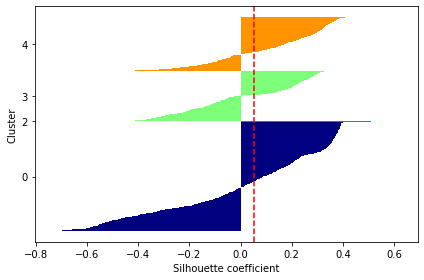

In [12]:
plot_silhouettes(X_norm, clusters)

    Next, compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity 
    values of the generated clusters.

In [13]:
# Code for homogeneity and completeness taken from lecture notebooks
from sklearn.metrics import completeness_score, homogeneity_score

print(completeness_score(y,clusters))

0.42241388187711487


In [14]:
print(homogeneity_score(y,clusters))

0.23130986562722525
